In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

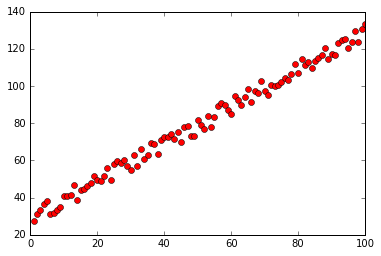

In [6]:
# Numpy version from : http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:,1]+1,y,"ro")
plt.show()

In [14]:
# m denotes the number of examples here, not the number of features
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
        if i % 2500 == 0:
            theta_list.append(theta)
    return theta,np.array(theta_list)

m, n = np.shape(x)
numIterations= 50000
alpha = 0.0005
theta = np.ones(n)

theta,theta_list = gradient_descent(x, y, theta, alpha, m, numIterations)

theta

array([ 30.37251327,   0.99678981])

[[  1.01461337   1.72169927]
 [  9.00461601   1.31894381]
 [ 14.82615351   1.23117515]
 [ 19.06548383   1.16726071]
 [ 22.1526273    1.12071726]
 [ 24.40073115   1.08682363]
 [ 26.03783385   1.06214178]
 [ 27.22999643   1.04416809]
 [ 28.09814697   1.03107939]
 [ 28.73034712   1.02154799]
 [ 29.19072469   1.01460709]
 [ 29.52597849   1.00955263]
 [ 29.7701153    1.00587189]
 [ 29.94789936   1.00319152]
 [ 30.07736436   1.00123963]
 [ 30.1716427    0.99981824]
 [ 30.24029759   0.99878316]
 [ 30.29029311   0.9980294 ]
 [ 30.32670059   0.99748051]
 [ 30.35321306   0.99708079]]


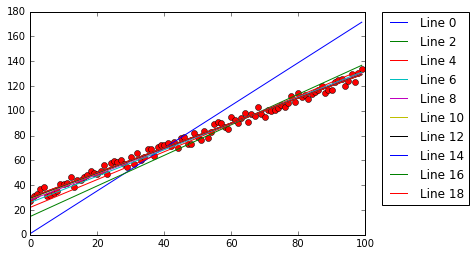

In [15]:
y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

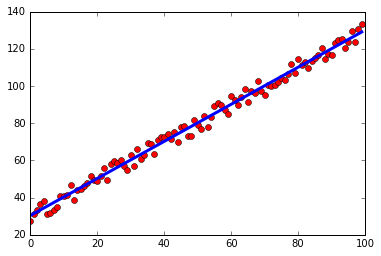

In [10]:
y_predict= np.dot(x, theta)
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)
plt.show()